In [10]:

"""
    t, y = myeulersv(fun, a, b, n, y1)

Solve IVP y' = fun(t, y), a <= t <= b, y(a) = y1 using Euler's method.
Use the integration step h = (b - a)/(n - 1). Return a vector of values
of the independent variable t_i, and a matrix of correspondinig values
of the solution, y(t_i)
"""

function myeulersv(fun, a, b, n, y1)
    t= range(a, b, n)
    neqs = length(y1)
    dydt = zeros(neqs) # allocate the vector of derivatives
    y = zeros(neqs, n) # allocate the matrix of solutions
    h = t[2] - t[1]
    y[:, 1] = y1
    for i = 1:n-1
        k1= h*fun(t[i], y[:, i])
        y[:, i+1] = y[:, i] + k1
    end
    return t, y
end

myeulersv (generic function with 1 method)

In [11]:

function frict(t,y)
    dydt = zeros(2)
    dydt[1] = y[2]
    dyty[2] = -y[1] - y[2]
    return dydt
end

frict (generic function with 1 method)

In [12]:

a = 0.0
b = 10.0
n=100
y1 = [1.0,0.0]

2-element Vector{Float64}:
 1.0
 0.0

In [13]:

t, y = myeulersv(frict, a, b, n, y1)

LoadError: UndefVarError: `dyty` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [14]:

using PyPlot

In [15]:

plot(t, y[1, :])

LoadError: UndefVarError: `t` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [16]:

plot(t, y[1, :], label="coordinate")
plot(t, y[2, :], label="velocity")
grid(true)
title("Oscilater with Friction")
xlabel("Time")

LoadError: UndefVarError: `y` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [17]:

plot(y[1, :], y[2, :])
grid(true)
scatter(y1...)
title("Oscilater with Friction")
xlabel("Coordinate")
ylabel("Velocity")

LoadError: UndefVarError: `y` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [62]:

### Spherical Bessel Function

In [41]:

function bes(x, u)
    dudx = zeros(2)
    dudx[1] = u[2]
    dudx[2] = abs(x) > eps() ? -2/x*u[2]-(1-2/x^2) * u[1] : 0.0
    return dudx
end

bes (generic function with 1 method)

In [58]:

abes = 0.0
bbes = 20.0
nbes = 4000
uobes = [0.0, 1/3]

2-element Vector{Float64}:
 0.0
 0.3333333333333333

In [59]:

x, u = myeulersv(bes, abes, bbes, nbes, uobes)

(0.0:0.005001250312578144:20.0, [0.0 0.0016670834375260481 … -0.01873680946220431 -0.01848870732252748; 0.3333333333333333 0.3333333333333333 … 0.049608022828381886 0.04967644511115136])

In [60]:

j1exact(x) = abs(x) > eps() ? sin(x)/x^2 - cos(x)/x : 0

j1exact (generic function with 1 method)

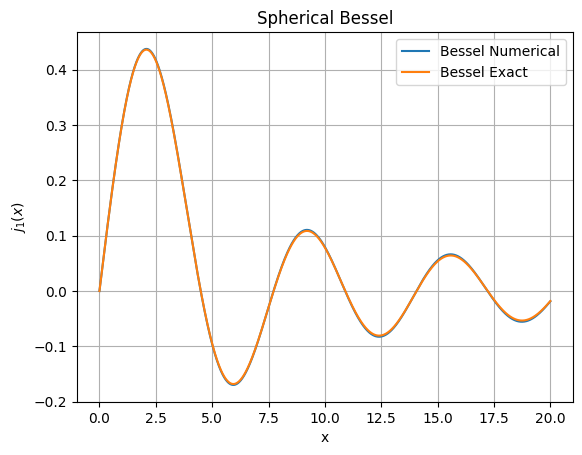

PyObject Text(0.5, 1.0, 'Spherical Bessel')

In [61]:

plot(x,u[1, :], label="Bessel Numerical")
plot(x, j1exact.(x), label="Bessel Exact") #the dot after the j1exact is to make sure the function plots every and all values for the changing x
grid(true)
xlabel("x")
ylabel(L"j_1(x)")
legend()
title("Spherical Bessel")